In [264]:
import sys
import os
import time
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import nibabel as nib

In [869]:
from nibabel.testing import data_path
#The below code is using the corresponding mask of the input image
example_file1 = os.path.join(data_path,"/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_flairMask.nii.gz")
#It is taking the input image
example_file2 = os.path.join(data_path,"/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_flair.nii.gz")

In [891]:
#Loading of images
brain_mask = nib.load(example_file1)
img = nib.load(example_file2)



In [892]:
from intensity_normalization.normalize import fcm


In [858]:
#Don't run this cell unless using T1-W images 
wm_mask = fcm.find_wm_mask(img, brain_mask)
nib.save(wm_mask,"/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_t1_wMask.nii.gz")

In [893]:
#Load the wm_mask of a particular patient
example_file3 = os.path.join(data_path,"/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_t1_wMask.nii.gz")

In [894]:
wm_mask = nib.load(example_file3)




In [895]:
normalized = fcm.fcm_normalize(img, wm_mask)


In [896]:
#Saving the normalized image with the same name as the input image
nib.save(normalized, '/home/bhakti/Desktop/selected images/HGG/Brats18_TCIA08_469_1/Brats18_TCIA08_469_1_flair.nii.gz')

In [897]:
type(normalized)


nibabel.nifti1.Nifti1Image

In [898]:
#Don't need to run from this line
import intensity_normalization

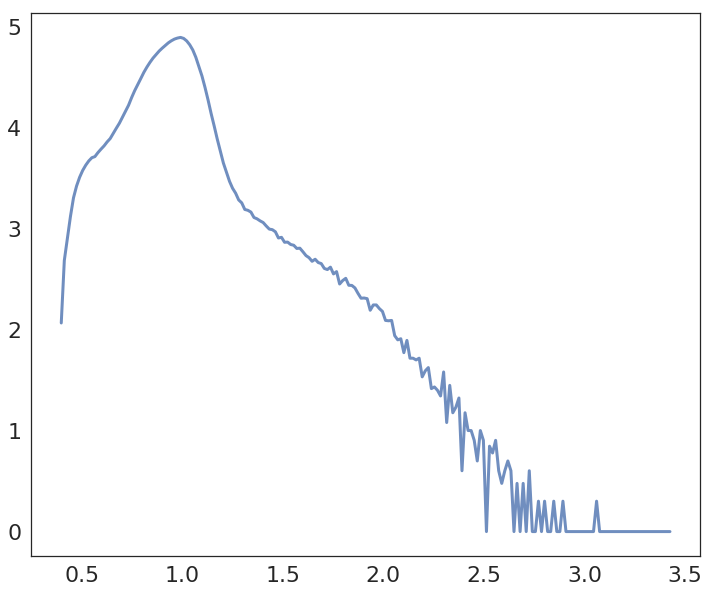

In [899]:
intensity_normalization.plot.hist.hist(img, mask=brain_mask, ax=None, n_bins=200, log=True, alpha=0.8, lw=3)

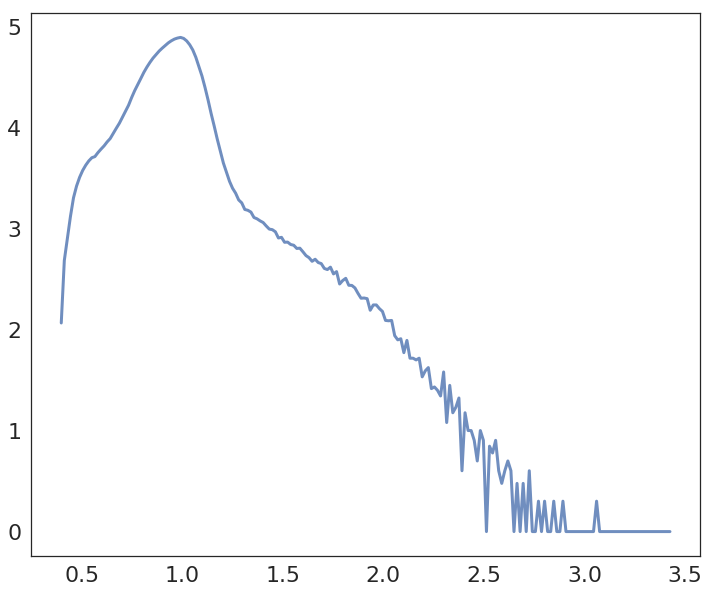

In [900]:
intensity_normalization.plot.hist.hist(normalized, mask=brain_mask, ax=None, n_bins=200, log=True, alpha=0.8, lw=3)

In [879]:
epi_img_data = normalized.get_fdata()


In [519]:
epi_img_data.shape

(240, 240, 155)

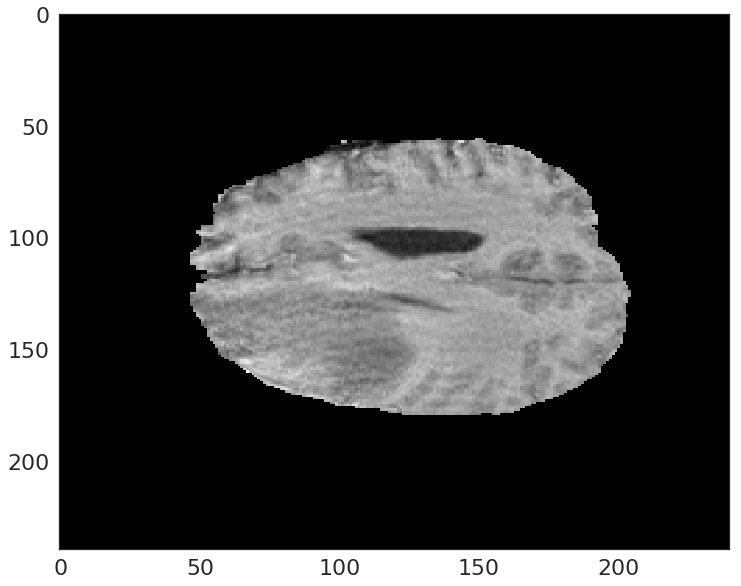

In [880]:


plt.imshow(epi_img_data[:, :, 100 ], 'gray', aspect = 0.8)


In [661]:
np.set_printoptions(threshold=None)

In [662]:
epi_img_data[:, 120, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])